In [3]:
def coin_change(coins, amount):
    coins.sort(reverse=True)  # Sort the coins in descending order
    coin_count = 0  # Variable to keep track of the total number of coins used
    change = []     # List to store the coins used
    
    for coin in coins:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            change.append(coin)
            
    if amount == 0:
        print(f"Minimum number of coins required: {coin_count}")
        print("Coins used:", change)
    else:
        print("Not possible to get the desired change with the coins.")

coins = [1,2,5,10,20,50,100,200]  # List of available coins
amount = 93                       # Amount for which we need to find the minimum number of coins

coin_change(coins, amount)

Minimun number of coins required: 5
Coins used: [50, 20, 20, 2, 1]


In [7]:
def coin_change(coins, amount):
    coins.sort(reverse=True)
    coin_count = 0
    change = []
    
    for coin in coins:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            change.append(coin)
            
    if amount == 0:
        print(f"Minimum number of coins required: {coin_count}")
        print("Coins used:", change)
    else:
        print("Not possible to get the desired change with the coins.")

coins = [1,5,10,20,50,100,]
amount = 45

coin_change(coins, amount)

Minimum number of coins required: 3
Coins used: [20, 20, 5]


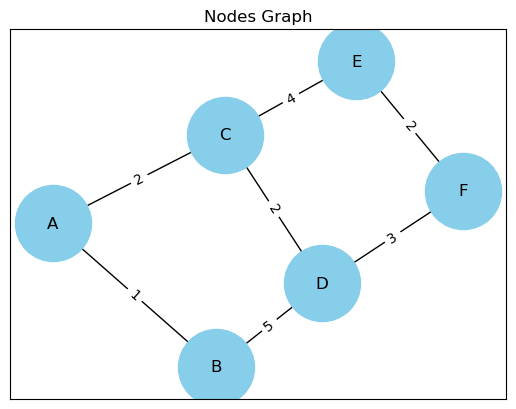

A* path: ['A', 'C', 'D', 'F']


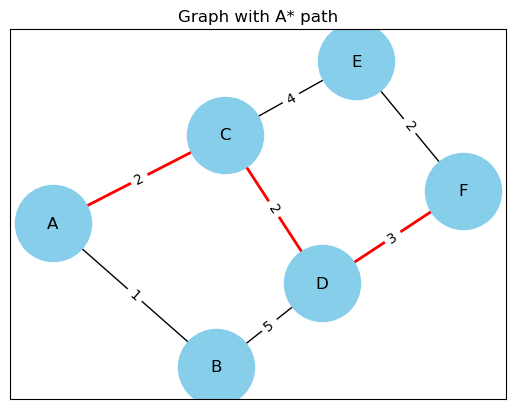

In [11]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, name, heuristic_cost):
        self.name = name
        self.heuristic_cost = heuristic_cost
        self.adjacent = {}
        self.parent = None
        self.g_cost = float("inf")
        
    def add_neighbor(self, neighbor, cost):
        self.adjacent[neighbor] = cost
    
    def __lt__(self, other):
        return self.g_cost + self.heuristic_cost < other.g_cost + other.heuristic_cost
    
def astar_search(start, goal):
    open_list = []
    closed_set = set()
    
    start.g_cost = 0
    heapq.heappush(open_list, start)
    
    while open_list:
        current_node = heapq.heappop(open_list)
        
        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]
        
        closed_set.add(current_node)
        
        for neighbor, cost in current_node.adjacent.items():
            tentative_g_cost = current_node.g_cost + cost
            
            if neighbor in closed_set and tentative_g_cost >= neighbor.g_cost:
                continue
            
            if tentative_g_cost < neighbor.g_cost or neighbor not in open_list:
                neighbor.g_cost = tentative_g_cost
                neighbor.parent = current_node
                if neighbor not in open_list:
                    heapq.heappush(open_list, neighbor)
                    
    return None

A = Node("A", 5)
B = Node("B", 4)
C = Node("C", 3)
D = Node("D", 2)
E = Node("E", 1)
F = Node("F", 0)

A.add_neighbor(B, 1)
A.add_neighbor(C, 2)
B.add_neighbor(D, 5)
C.add_neighbor(D, 2)
C.add_neighbor(E, 4)
D.add_neighbor(F, 3)
E.add_neighbor(F, 2)

G = nx.Graph()
edges = [(A.name, B.name, {'weight': 1}), (A.name, C.name, {'weight': 2}),
         (B.name, D.name, {'weight': 5}), (C.name, D.name, {'weight': 2}),
         (C.name, E.name, {'weight': 4}), (D.name, F.name, {'weight': 3}),
         (E.name, F.name, {'weight': 2})]
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000,
node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Nodes Graph')
plt.show()

path = astar_search(A, F)
print("A* path:", path)

plt.title('Graph with A* path')
nx.draw_networkx(G, pos, with_labels=True, node_size=3000,
node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in
range(len(path) - 1)], edge_color='r', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
